In [1]:
import os
import sys
sys.path.insert(1,'./src')
import numpy as np
import h5py

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.cm as colormap

from proc_funcs import find_nearest, make_rgb_dc,AOI
from cd_funcs import c2va
from img_list import use_cases

In [2]:
path_l2d = '../DATABASE/' 
use_case='Po_01'

In [3]:
# Set to True to show plots, save them, and/or save processed files
make_plots = True
save_plots = False
save_files = False
load_files= False

In [4]:
#setting use case parameters
name_case_study=use_case
threshold=use_cases[use_case][4]
bandcva_x=use_cases[use_case][6][0]
bandcva_y=use_cases[use_case][6][1]
diff_band=use_cases[use_case][7]

In [5]:
# General imports

t1 = np.load(path_l2d+'iimg1_'+name_case_study+'.npy')
t2 = np.load(path_l2d+'Im2recalee_'+name_case_study+'.npy')
vwl = np.load(path_l2d+'wl_total_'+name_case_study+'.npy')
intx=np.load(path_l2d+'long_'+name_case_study+'.npy')
inty=np.load(path_l2d+'lat_'+name_case_study+'.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


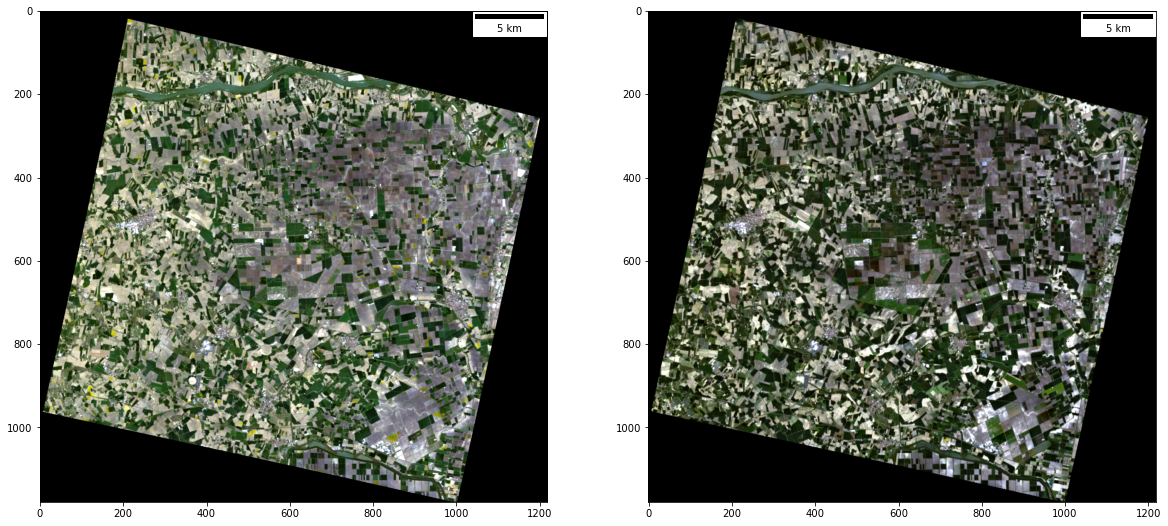

In [6]:
#plot coregistered input data
rgb1 = make_rgb_dc(t1,vwl)
rgb2 = make_rgb_dc(t2,vwl)

if make_plots is True:

    plt.figure(figsize=(20,20))

    plt.subplot(2,2,1)
    plt.imshow(rgb1)
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)

    plt.subplot(2,2,2)
    #threshold=0.2
    #rgb2[rgb2>threshold]=threshold
    #rgb2=rgb2/threshold
    plt.imshow(rgb2)
    scalebar = ScaleBar(30) # 1 pixel = 30 meter
    plt.gca().add_artist(scalebar)
    #np.max(rgb2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
D:\Escritorio\Msc Geoinf\Internship\PRISMA Products\geoinformatics_project\./src\proc_funcs.py:149: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--y" (-> color='y'). The keyword argument will take precedence.
  ax.plot(col, row, "--y",linewidth=7,color='red')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the datacube is now cropped to the new AOI
those are the new sizes:
(512, 512, 230)
(512, 512, 230)


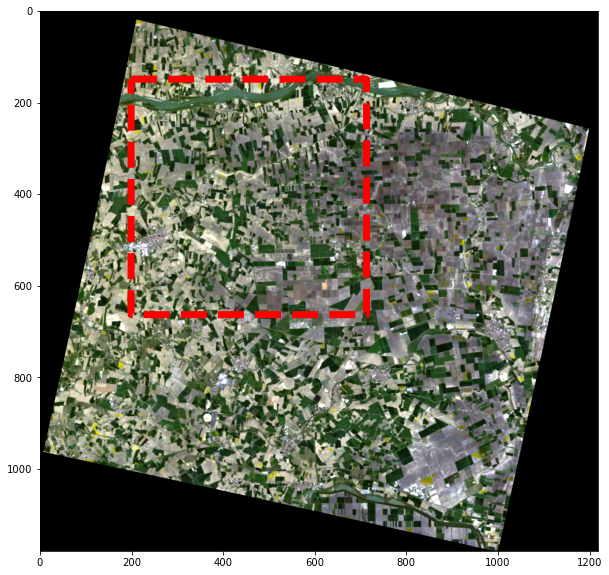

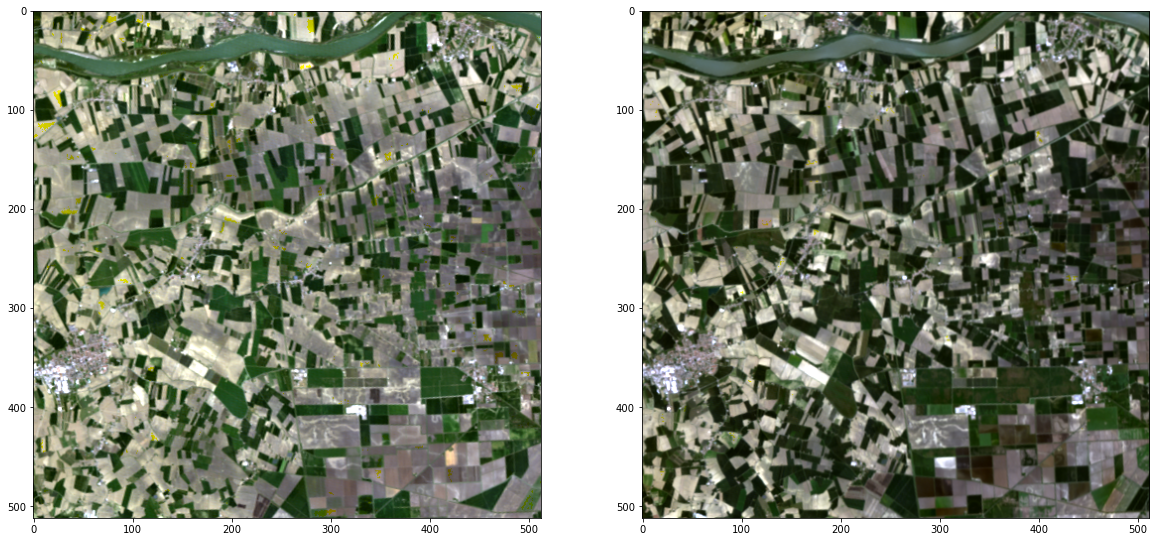

In [7]:
# selecting the AOI of CD
rgb1,rgb2,t1,t2,xcrop,ycrop=AOI(t1,t2,vwl, long=intx, lat=inty,key=use_case,coreg=False)

In [8]:
if save_files is True:
    np.save(path_l2d+'img1_cd_'+name_case_study, t1)
    np.save(path_l2d+'img2_cd_'+name_case_study, t2)
    np.save(path_l2d+'lat_cd_'+name_case_study, ycrop)
    np.save(path_l2d+'long_cd_'+name_case_study, xcrop) 

### C2VA

In [9]:
magc2va, angc2va=c2va(vwl, vwl, t1, t2)

In [10]:
binary_c2va=np.where(magc2va>np.percentile(magc2va,threshold),1,0)

In [11]:
# If the arrays are already stored in the DATABASE directory you can just load them instead of computing them
if load_files is True:
    magc2va = np.load(path_l2d+'magc2va_'+name_case_study+'.npy')
    angc2va = np.load(path_l2d+'angc2va_'+name_case_study+'.npy')
    binary_c2va = np.load(path_l2d+'binary_c2va_'+name_case_study+'.npy')

In [12]:
path_l2d+'binary_c2va_'+name_case_study+'.npy'

'../DATABASE/binary_c2va_Po_01.npy'

In [13]:
np.shape(binary_c2va)

(512, 512)

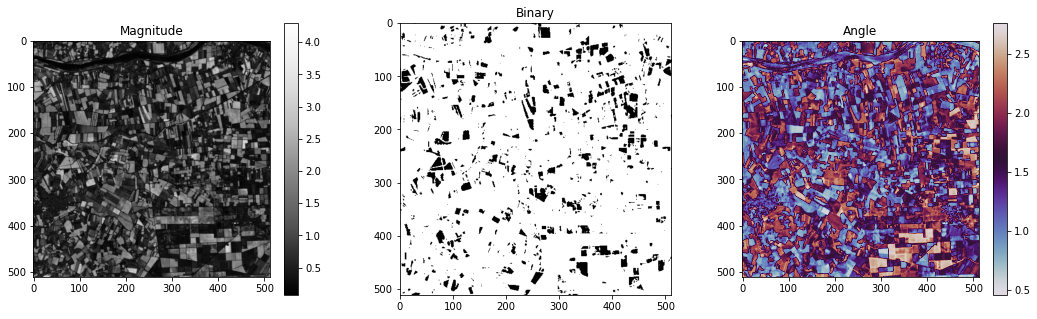

In [14]:
if make_plots is True:

    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.imshow(magc2va,cmap='Greys_r')
    plt.colorbar()
    plt.title("Magnitude")
    #scalebar = ScaleBar(30) # 1 pixel = 30 meter
    #plt.gca().add_artist(scalebar)

    plt.subplot(1,3,2)
    plt.imshow(binary_c2va,cmap='binary')
    plt.title("Binary")

    plt.subplot(1,3,3)
    plt.imshow(angc2va,cmap='twilight')
    plt.colorbar()
    plt.title("Angle")
    
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_mag_binary_angle_c2va.png')
        plt.imsave(path_l2d+'cm_'+name_case_study+'.png', binary_c2va, cmap=colormap.gray)

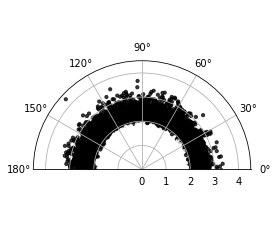

In [15]:
theta = np.ravel(angc2va)*180./np.pi #np.linspace(0,np.pi)
r = np.ravel(magc2va) #np.sin(theta)

if make_plots is True:
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    c = ax.scatter(theta, r, c=binary_c2va.ravel(), s=10, cmap='binary', alpha=0.75)

    ax.set_thetamin(0)
    ax.set_thetamax(180)
    if save_plots is True:
        plt.savefig(path_l2d+name_case_study+'_polarc2va.png')

In [16]:
if save_files is True:
    np.save(path_l2d+'magc2va_'+name_case_study, magc2va)
    np.save(path_l2d+'angc2va_'+name_case_study, angc2va) 
    np.save(path_l2d+'binary_c2va_'+name_case_study, binary_c2va)
    